# 0. Librerias

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sbn

# 1. Cargar archivos

In [140]:
prec_df = pd.read_csv("precipitaciones.csv")
banco_df = pd.read_csv("banco_central.csv")

# 2. Análisis de datos

## - Analizando los datos del archivo de precipitaciones

In [19]:
prec_df #vision general del archivo

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.000000,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.000000,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.000000,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.000000,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235
...,...,...,...,...,...,...,...,...,...
491,1988-10-01,0.000000,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.000000,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.000000,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419


In [20]:
prec_df.columns #ver las columnas

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

### Se visualiza que el archivo corresponde a las precipitaciones medias registradas en distintas fechas para 8 regiones.

In [21]:
prec_df.equals(prec_df.drop_duplicates()) # Si es True, entonces no hay filas duplicadas

True

In [22]:
prec_df.isnull().values.any() # Si es False, entonces no hay registros NaN en el archivo

False

In [176]:
prec_df.dtypes # Ver el tipo de data de cada columna

date                                   datetime64[ns]
Coquimbo                                      float64
Valparaiso                                    float64
Metropolitana_de_Santiago                     float64
Libertador_Gral__Bernardo_O_Higgins           float64
Maule                                         float64
Biobio                                        float64
La_Araucania                                  float64
Los_Rios                                      float64
dtype: object

### No hay problemas con el registro de los datos, en cuanto a si difiere el tipo de datos para las columnas de regiones, como también en cuanto a si faltan datos o hay datos duplicados. Sin embargo, para la columna "date", es conveniente de que no sean de tipo "object" y sí sea de tipo "datetime". Se procede a convertirlo

In [175]:
prec_df["date"] = prec_df["date"].apply(lambda x: pd.to_datetime(str(x).replace("-",""), format = '%Y%m%d'))

In [177]:
prec_df.describe() # datos estadísticos para cada columna

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


### Con lo anterior, se aprecia que el promedio de las precipitaciones aumentan a medida que la región esté más al sur (zona más probable de precipitaciones), al igual que el máximo valor registrado entre las fechas del archivo. También que en esas regiones de mayor precipitacion hay una mayor desviación estándar, lo que indica que no hay una importante diferencia en cuanto a la cantidad de "mm" de precipitación caída según la fecha registrada. En cuanto a los cuartiles, mientras el 50% de los registros para las regiones de Coquimbo, Valparaiso, Metropolitana y O'Higgins son menores a 26mm, el 75% de los registros de las regiones del Biobio, La Araucanía y Los Ríos son mayores a dicho valor de precipitaciones.

## - Analizando los datos del archivo de las variables económicas

In [141]:
banco_df #vision general del archivo

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01 00:00:00 UTC,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,99.298.129,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN
610,2008-09-01 00:00:00 UTC,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,972.530.264,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN
611,2008-10-01 00:00:00 UTC,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,105.609.319,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN
612,2008-11-01 00:00:00 UTC,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,10.738.286,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN


In [142]:
banco_df.columns #ver las columnas

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

### Se visualiza que el archivo posee diversas variables económicas (84 en total) del Banco Central. Sin embargo, llama la atención la variable "No_sabe__No_responde_Miles_de_personas", ya que se presume que, por su título, es un error que registra el archivo o no se tiene el contexto necesario como para comprender a qué se refiere la variable.

In [143]:
banco_df.equals(banco_df.drop_duplicates()) # Si es False, entonces existen filas duplicadas

False

In [144]:
banco_df.isnull().values.any() # Si es True, entonces existen registros NaN en el archivo

True

In [154]:
n_col = 5 # grupo n_col de 10 columnas para ver su tipo, donde n_col pertenece a N
banco_df.iloc[:,10*(n_col-1):10*n_col].dtypes # Ver el tipo de un grupo de columnas

Ocupacion_en_Otras_actividades_de_servicios_INE                                object
Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE                   object
Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE    object
Tipo_de_cambio_nominal_multilateral___TCM                                      object
Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100                          object
Indice_de_produccion_industrial                                                object
Indice_de_produccion_industrial__mineria                                       object
Indice_de_produccion_industrial_electricidad__gas_y_agua                       object
Indice_de_produccion_industrial__manufacturera                                 object
Generacion_de_energia_electrica_CDEC_GWh                                       object
dtype: object

### El conjunto de datos posee valores NaN y filas duplicadas, por lo que se hace importante hacer una limpieza previa a ser utilizado en algún procesamiento. Por otro lado, la mayoría de sus columnas son del tipo object, salvo unos pocos que son del tipo float64. Se procede a realizar la limpieza con tal de que no tengan duplicados ni valores NaN.

In [159]:
banco_df = banco_df.drop_duplicates() # Eliminar duplicados
banco_df = banco_df.dropna(thresh = banco_df.shape[1] - 1) # Eliminar filas donde todos sus valores son NaN, a excepción de la primera fila (fecha)
banco_df = banco_df.dropna(1, thresh = banco_df.shape[0] / 2) # Eliminar columnas que poseen a lo menos la mitad de sus datos como NaN
banco_df = banco_df.reset_index(drop = True) # Resetear la columna de indexacion, debido a las filas eliminadas.

In [158]:
banco_df # Se visualiza el dataframe limpio

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2014-01-01 00:00:00 UTC,976.113.405,101.540.937,977.900.376,985.915.778,107.470.632,103.244.622,93.851.301,97.687.997,975.892.915,...,953.168.559,983.556.345,952.485.355,103.655.736,1.002.002,586.099.923,940.249.286,943.909.236,924.800.591,34224.0
1,2014-02-01 00:00:00 UTC,935.602.943,982.574.646,942.799.014,918.649.843,107.454.234,102.175.861,888.267.283,9.371.354,934.715.034,...,980.897.642,938.923.994,916.458.759,97.391.498,95.303.087,533.983.892,911.554.678,928.126.259,841.605.817,25716.0
2,2014-03-01 00:00:00 UTC,105.885.915,107.308.181,101.285.403,105.167.997,114.516.992,11.737.952,103.080.921,106.096.113,106.453.564,...,9.928.703,103.103.563,987.235.299,104.907.399,107.014.458,593.741.564,1.014.057,101.583.412,100.655.575,27801.0
3,2014-04-01 00:00:00 UTC,103.133.424,10.071.414,974.925.445,103.903.594,100.708.701,106.543.369,105.138.498,103.606.386,103.829.441,...,976.412.782,100.113.621,963.311.237,992.049.154,104.061.349,559.289.299,953.361.487,963.546.529,910.370.289,26698.0
4,2014-05-01 00:00:00 UTC,103.643.345,101.511.782,106.591.405,103.056.896,956.634.254,103.126.713,105.888.966,103.961.362,103.279.589,...,976.209.378,102.597.352,10.435.565,101.106.965,101.204.581,586.300.727,998.288.464,998.625.376,996.866.358,25289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020-05-01 00:00:00 UTC,982.393.209,969.940.132,106.092.921,937.147.742,924.598.764,893.637.866,101.805.244,987.747.993,972.149.892,...,101.774.069,974.478.672,100.006.637,106.233.534,928.877.962,6406.2,843.783.483,836.117.127,876.143.273,8681.0
77,2020-06-01 00:00:00 UTC,968.929.046,909.523.847,103.616.298,920.403.499,80.182.653,891.539.668,103.608.903,974.199.885,96.001.603,...,100.561.281,946.860.578,972.407.155,106.350.102,894.644.274,6419.1,835.159.772,824.851.611,878.670.656,8971.0
78,2020-07-01 00:00:00 UTC,966.693.225,933.369.433,104.988.256,969.434.205,813.420.488,931.746.336,996.428.565,966.321.757,955.926.074,...,100.164.187,977.952.851,989.525.701,10.629.584,946.859.919,6477.7,901.338.756,878.226.907,998.894.175,11454.0
79,2020-08-01 00:00:00 UTC,101.314.552,926.876.935,103.697.799,980.026.279,798.286.232,108.232.893,104.806.496,100.569.037,10.092.332,...,10.151.671,990.282.658,10.054.901,105.462.309,960.377.084,6452,119.872.405,107.356.493,172.702.233,19037.0


### La limpieza fue realizada con éxito, obteniendo un dataframe de 81 filas y 84 columnas, a diferencia de la original que tenía 614 filas y 85 columnas (la columna eliminada fue justamente la que llamó la atención).

In [160]:
banco_df.describe() # datos estadísticos para cada columna

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1318.308148,162.907309,178.208025,2.898126,61.632593,57.246914,66.560074,27672.024691
std,178.252441,40.121616,52.214066,0.825226,20.252107,18.747428,25.337796,6523.050488
min,1068.450000,16.634000,79.490000,1.612800,23.340000,16.520000,29.233000,8681.000000
25%,1223.100000,151.238000,143.970000,2.364700,47.240000,46.200000,46.610000,23891.000000
50%,1280.330000,165.094000,177.700000,2.819800,59.250000,53.400000,57.976000,28038.000000
75%,1331.940000,176.326000,198.460000,3.082000,68.990000,62.760000,88.043000,32377.000000
max,1969.780000,270.033000,297.880000,5.984200,111.870000,105.240000,142.797000,39263.000000


### Solo se obtienen datos estadísticos para los valores de precio y cantidad de ventas.

# 3. Visualización

In [208]:
def precipitaciones(region, f_ini, f_ter):
    try:
        graficar_df = prec_df[prec_df['date'] >= datetime.strptime(f_ini, '%Y-%m-%d')]
        graficar_df = graficar_df[graficar_df['date'] <= datetime.strptime(f_ter, '%Y-%m-%d')]
        graficar_df = graficar_df[["date",region]]
        graficar_df = graficar_df.sort_values(by=["date"])
        graficar_df = graficar_df.set_index("date")
        sbn.set(rc={'figure.figsize':(10, 5)})
        graficar_df[region].plot(linewidth=0.6)
        print(graficar_df)
    except ValueError:
        print("Argumento ingresado no se encuentra en el archivo de precipitaciones")

            Libertador_Gral__Bernardo_O_Higgins
date                                           
2000-01-01                             0.085411
2000-02-01                            37.463519
2000-03-01                             0.049333
2000-04-01                            28.465287
2000-05-01                            37.215302
...                                         ...
2019-09-01                            42.662558
2019-10-01                            13.204651
2019-11-01                             4.307132
2019-12-01                             6.198806
2020-01-01                             6.154279

[241 rows x 1 columns]


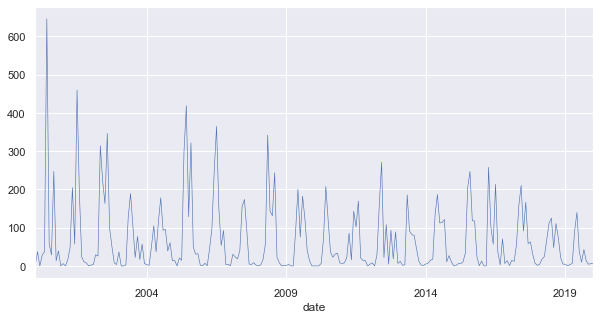

In [209]:
precipitaciones("Libertador_Gral__Bernardo_O_Higgins","2000-01-01","2020-01-01")

### Se aprecia que hay una mayor cantidad de agua caída durante los meses de invierno en cada año. Sin embargo, dicha cantidad ha disminuido a medida que han pasado los años. Por otro lado, en los meses de primavera-verano la cantidad de agua es ínfima y aquello sí se ha mantenido durante los años de evaluación.

Timestamp('2009-09-01 00:00:00')

In [184]:
prec_df[prec_df['date'] > datetime.strptime("2008-12-01", '%Y-%m-%d')]

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235
5,2015-01-01,0.239366,0.025617,0.365453,0.000000,0.011922,0.001170,0.005331,1.462817
6,2016-03-01,1.410340,0.173750,0.056896,0.000000,0.464601,15.188883,28.314859,42.045866
7,2020-03-01,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866
9,2015-12-01,0.272739,0.283084,0.688792,0.410341,0.513311,20.054594,71.496481,103.072700
...,...,...,...,...,...,...,...,...,...
489,2011-03-01,1.553065,4.684269,9.450067,21.832403,36.230033,59.200891,90.166794,158.491137
490,2018-03-01,0.083333,1.501153,3.839144,17.900047,41.166140,87.381849,144.213397,250.525723
492,2019-08-01,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.000000,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
